<a href="https://colab.research.google.com/github/philip-persan/desafio_7_curso_DNC/blob/main/Desafio_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Comportamento de Clientes para Personalização de Campanhas de Marketing

### Introdução
Este notebook foi desenvolvido para a empresa de e-commerce XYZ com o objetivo de entender melhor o comportamento de seus clientes e, assim, personalizar suas campanhas de marketing de forma mais eficaz. A empresa forneceu uma base de dados em formato CSV contendo informações sobre clientes, produtos e transações realizadas na loja entre os anos de 2010 e 2011.

### Objetivo
O principal objetivo deste projeto é agrupar os clientes em clusters com base em seu comportamento de compra. A partir desses clusters, poderemos identificar padrões e características comuns entre os clientes, como:

- Produtos mais comprados pelos clientes;
- Frequência de compras;
- Valor gasto em compras.

Esses insights permitirão que a empresa segmente sua base de clientes de maneira mais precisa e direcione campanhas de marketing personalizadas, aumentando a relevância das promoções e ofertas para cada grupo de clientes.

### Metodologia
Para alcançar os objetivos propostos, seguimos as seguintes etapas:

1. **Análise Exploratória dos Dados (EDA)**: Realizamos uma análise inicial para compreender a estrutura dos dados, identificar padrões preliminares e limpar os dados.
2. **Pré-processamento dos Dados**: Tratamos dados ausentes, normalizamos e transformamos os dados para prepará-los para a modelagem.
3. **Agrupamento de Clientes (RFM)**: Utilizamos agrupamentos para fazer o calculo de RFM dos clientes no DataSet.
4. **Agrupamento de Clientes (Clustering)**: Utilizamos algoritmos de clustering para identificar grupos de clientes com comportamentos de compra semelhantes.
5. **Geração de Insights**: Analisamos os clusters identificados para extrair características comuns e comportamentos de compra específicos de cada grupo.
6. **Recomendações de Marketing**: Propomos estratégias de marketing personalizadas com base nos insights obtidos, visando aumentar a eficácia das campanhas de marketing.

### Benefícios Esperados
- **Segmentação Precisa**: Identificação de grupos de clientes com comportamentos de compra semelhantes.
- **Marketing Personalizado**: Criação de campanhas de marketing direcionadas e mais eficazes.
- **Aumento da Satisfação do Cliente**: Melhoria na experiência do cliente por meio de ofertas e promoções relevantes.
- **Potencial Aumento nas Vendas**: Maior engajamento dos clientes com as campanhas, resultando em aumento das vendas e fidelização.

### Conclusão
Este projeto visa fornecer à empresa XYZ uma compreensão mais profunda do comportamento de seus clientes, permitindo a criação de campanhas de marketing mais eficazes e personalizadas. Com isso, esperamos que a empresa possa atender melhor às necessidades de seus clientes, aumentando a satisfação e fidelização, além de impulsionar suas vendas.

# 0. Importação das Bibliotécas e dos Dados.

In [ ]:
%%capture
%pip install sidetable

In [ ]:
import pandas as pd
import numpy as np
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import scale, PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from yellowbrick.cluster import kelbow_visualizer

In [ ]:
dados = pd.read_csv('data.csv', encoding='latin1')

# 1. Análise Exploratória dos Dados

In [ ]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dados.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dados.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Na coluna CustomerID está com muitos valores faltantes, para o calculo de RFM será necessário dropar(remover) as linhas que estão sem os dados.

In [ ]:
dados.duplicated().sum()

5268

# 2. Pré-Processamento dos Dados

## Dados nulos/faltantes

Detecção e Tratamento de dados nulos/faltantes

In [ ]:
dados.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [ ]:
dados = dados.dropna(subset=['CustomerID'])

In [ ]:
dados.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


## Conversão dos Tipos de Dados

In [ ]:
dados['InvoiceDate'] = pd.to_datetime(dados.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
dados['CustomerID'] = dados['CustomerID'].astype(int)
dados['Country'] = dados['Country'].astype('category')

In [ ]:
dados = dados.copy()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


## Intervalo de Datas dos Dados

In [ ]:
# Intervalo de datas dos dados
dados.InvoiceDate.agg(['min','max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

## Dados de Quantity e UnitPrice abaixos de 0 (zero)

In [ ]:
# Removendo os valores de Quantity e UnitPrice abaixo de zero
abaixo_de_zero = dados[['Quantity','UnitPrice']].le(0).any(axis=1)
dados = dados[~abaixo_de_zero].copy()

## Outliers

Detecção e Tratamento de Outliers

<Axes: >

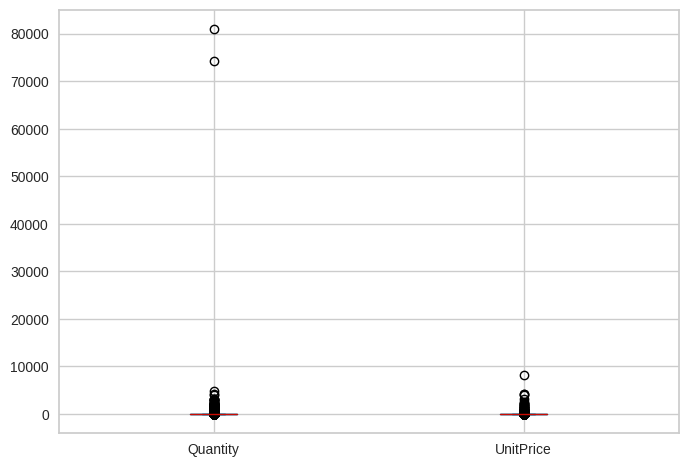

In [ ]:
dados[['Quantity','UnitPrice']].plot.box()

In [ ]:
# Encontrando os Outliers da coluna Quantity
dados.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

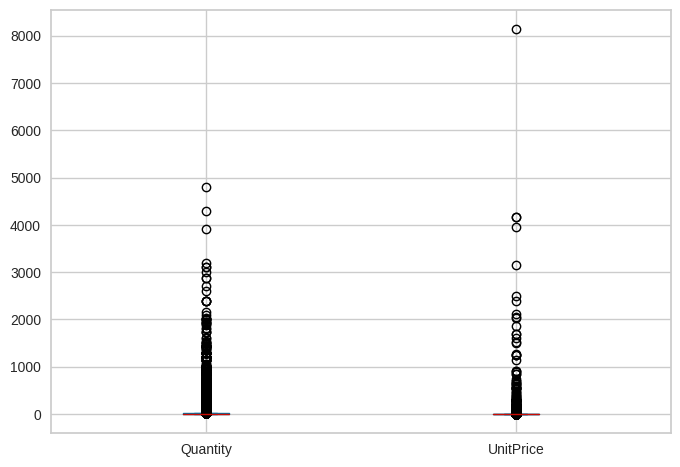

In [ ]:
# Visualizando os dados sem outliers em Quantity
dados.query('Quantity<10_000')[['Quantity','UnitPrice']].plot.box()

In [ ]:
# Encontrando Outliers da coluna UnitPrice
dados.query('UnitPrice>8_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [ ]:
# Removendo Outliers do DataSet
dados = dados.query('Quantity<10_000 & UnitPrice<8_000').copy()

## Criando a coluna Total Price

In [ ]:
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 3. RFM

In [ ]:
# Definindo uma data de referência para calculo
date_ref = pd.Timestamp('2012-01-01')

In [ ]:
dados_rfm = (
  dados.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (date_ref - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('TotalPrice', 'mean')
  )
)

dados_rfm

,R,F,M
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


## Detectando Outliers

<Axes: >

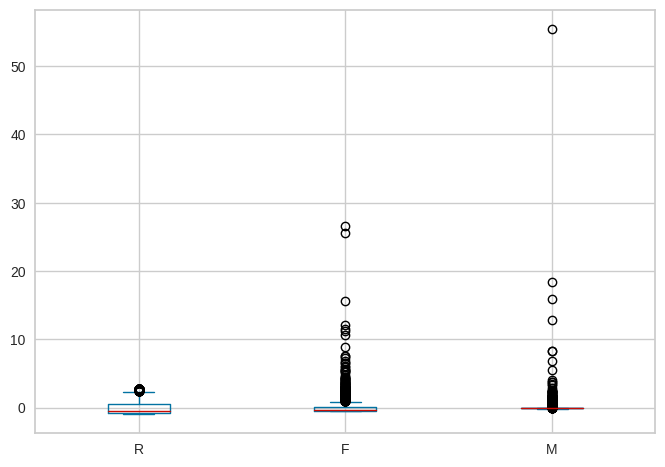

In [ ]:
# Verificando Outliers nos dados agrupados
dados_rfm.apply(scale).plot.box()

In [ ]:
# Buscando Outliers
dados_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [ ]:
# Buscando os pedidos do cliente 15098
dados.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [ ]:
# Dropando os valores do cliente 15098
dados_rfm = dados_rfm.drop(15098)

<Axes: >

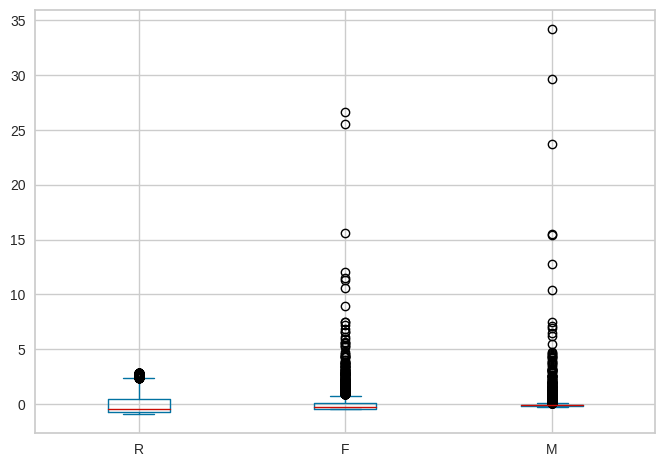

In [ ]:
# Checando Outliers Novamente
dados_rfm.apply(scale).plot.box()

In [ ]:
# Normalizando os dados
scaler = PowerTransformer()

dados_rfm_scaled = pd.DataFrame(scaler.fit_transform(dados_rfm), index=dados_rfm.index, columns=dados_rfm.columns)
dados_rfm_scaled

,R,F,M
CustomerID,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411
...,...,...,...
18280,1.475652,-1.158070,0.085562
18281,1.107356,-1.158070,-0.491003
18282,-1.275046,-0.195707,-0.161007


<Axes: >

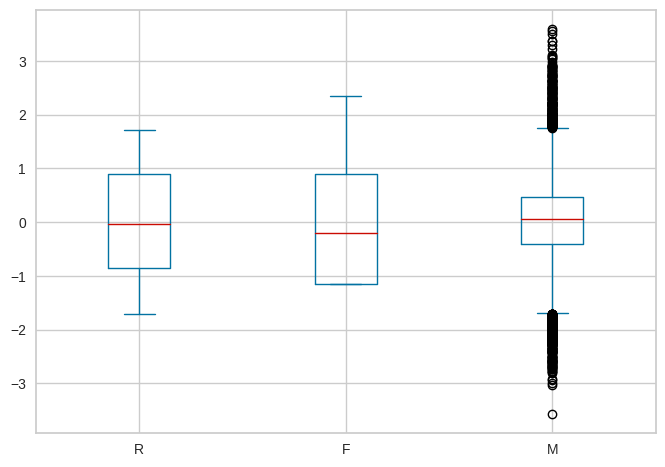

In [ ]:
dados_rfm_scaled.plot.box()

In [ ]:
dados_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


In [ ]:
# Limitando os valores superiores de cada coluna do DataFrame ao seu respectivo percentil 95 para mitigar a influência de outliers.

dados_rfm_clip = dados_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
dados_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [ ]:
# Normalizando os dados
dados_rfm_clip_scaled = dados_rfm_clip.apply(scale)

# 4. Clustering

## Kmeans

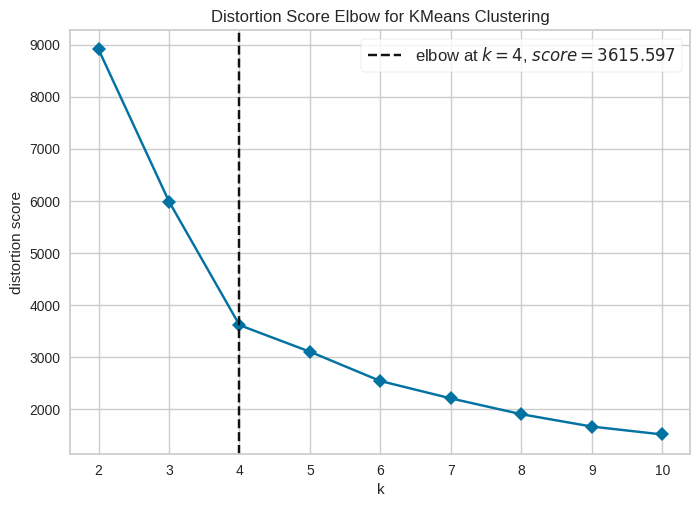

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init=10), timings=False)

In [ ]:
# Cria um visualizador (Elbow method) para ajudar a determinar o número ideal de clusters para o algoritmo KMeans.
kelbow_visualizer(KMeans(n_init=10), dados_rfm_clip_scaled, k=10, timings=False)

De acordo com o algoritimo kelbow a recomendação de clusters para o KMeans é 4.

Separando os clientes em quatro 4 grupos.

In [ ]:
# Avaliando diferentes métricas de clustering para k variando de 2 a 10 clusters usando KMeans e exibe os resultados em um DataFrame.

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = dados_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_init=k, n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

kmeans_scores = pd.DataFrame(cluster_metrics_results)
kmeans_scores.set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8906.589803,0.382311,1.065369,1995.770793
3,5987.858046,0.434196,0.858749,2539.996344
4,3615.604890,0.479553,0.704462,3751.144746
5,3104.952455,0.386183,0.854781,3453.363364
6,2542.498169,0.398087,0.851009,3564.654984
7,2209.186985,0.376864,0.870175,3526.795460
8,1907.066277,0.383598,0.862066,3599.016667
9,1668.785587,0.394119,0.800873,3675.190014
10,1516.641890,0.351595,0.887744,3641.963320


**Explicação das Métricas de Avaliação**

- **Inertia**: Mede o quão próximos os pontos estão dos centros dos clusters. Valores menores indicam clusters mais compactos.

- **Silhouette Score**: Avalia quão bem os pontos estão agrupados dentro de seus clusters. Valores próximos a 1 indicam clusters bem definidos.

- **Davies-Bouldin Score**: Mede a separação entre os clusters. Valores menores indicam clusters mais distintos e separados.

- **Calinski-Harabasz Score**: Avalia a densidade e separação dos clusters. Valores maiores indicam clusters mais densos e bem separados.

Como podemos observar a quantidade clusters 4 atende bem as metricas, como o algoritimo de kelbow nos sugeriu.

In [ ]:
# Treinando o modelo
kmeans = KMeans(n_init='auto', n_clusters=4)
kmeans_labels = kmeans.fit_predict(dados_rfm_clip_scaled)

In [ ]:
# Visualizando os clusters
px.scatter_3d(dados_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

## Hierarchical Clustering

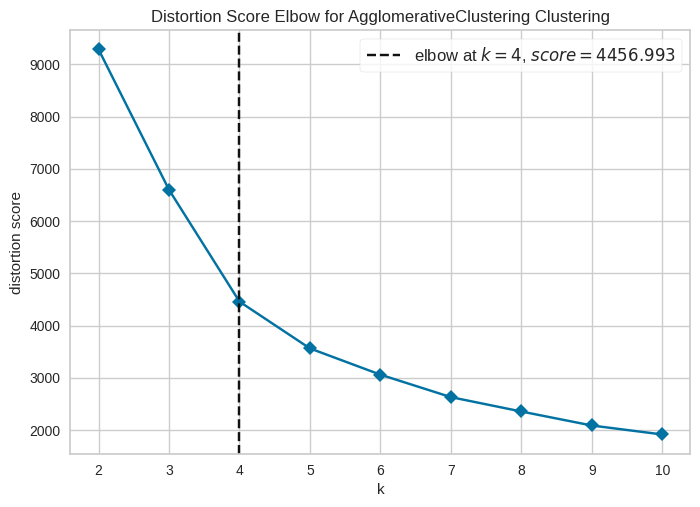

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [ ]:
# Cria um visualizador (Elbow method) para ajudar a determinar o número ideal de clusters para o algoritmo Hierarchical Clustering.
kelbow_visualizer(AgglomerativeClustering(), dados_rfm_clip_scaled, k=10, timings=False)

De acordo com o algoritimo kelbow a recomendação de clusters para o Hierarchical Clustering é 4.

Separando os clientes em quatro 4 grupos.

In [ ]:
# Avaliando diferentes métricas de clustering para k variando de 2 a 10 clusters usando Hierarchical Clustering e exibe os resultados em um DataFrame.
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = dados_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

hclust_scores = pd.DataFrame(cluster_metrics_results)
hclust_scores.set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.361292,1.331666,1737.623791
3,0.398928,0.869855,2104.783905
4,0.431886,0.761966,2770.399918
5,0.342136,0.897329,2872.239315
6,0.348298,0.791909,2816.854970
7,0.322680,0.844326,2848.491623
8,0.287643,0.967432,2799.001327
9,0.286883,0.976982,2832.797336
10,0.298923,0.953087,2786.657350


**Explicação das Métricas de Avaliação**

- **Silhouette Score**: Avalia quão bem os pontos estão agrupados dentro de seus clusters. Valores próximos a 1 indicam clusters bem definidos.

- **Davies-Bouldin Score**: Mede a separação entre os clusters. Valores menores indicam clusters mais distintos e separados.

- **Calinski-Harabasz Score**: Avalia a densidade e separação dos clusters. Valores maiores indicam clusters mais densos e bem separados.

Como podemos observar a quantidade clusters 4 atende bem as metricas, como o algoritimo de kelbow nos sugeriu.

In [ ]:
# Treinando o Modelo
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(dados_rfm_clip_scaled)

In [ ]:
# Visualizando os Clusters
px.scatter_3d(dados_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

In [ ]:
metrics_agglomerative = {
    'Algorithm': 'Hierarchical',
    'Inertia': None,
    'Silhouette Score': 0.431886,
    'Davies-Bouldin Score': 0.761966,
    'Calinski-Harabasz Score': 2770.399918
}

metrics_kmeans = {
    'Algorithm': 'KMeans',
    'Inertia': 3615.604890,
    'Silhouette Score': 0.479553,
    'Davies-Bouldin Score': 0.704462,
    'Calinski-Harabasz Score': 3751.144746
}

df_metrics = pd.DataFrame([metrics_agglomerative, metrics_kmeans])
df_metrics.set_index('Algorithm').style.background_gradient()

,Inertia,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
Algorithm,,,,
Hierarchical,nan,0.431886,0.761966,2770.399918
KMeans,3615.604890,0.479553,0.704462,3751.144746


Para determinar qual algoritmo foi melhor com base nos resultados fornecidos, podemos interpretar cada métrica da seguinte forma:

1. **Inertia**: Esta métrica é específica do KMeans e indica a soma das distâncias quadradas das amostras até o centro do cluster mais próximo. Quanto menor, melhor, pois indica clusters mais compactos.

2. **Silhouette Score**: Esta métrica avalia o quão bem definidos estão os clusters. Quanto mais próximo de +1, melhor. No seu caso:
   - KMeans: Silhouette Score = 0.479553
   - Hierarchical: Silhouette Score = 0.431886
   - Conclusão: O KMeans tem um Silhouette Score ligeiramente melhor que o Hierarchical, indicando uma melhor separação entre os clusters para o KMeans.

3. **Davies-Bouldin Score**: Avalia a dispersão dentro dos clusters em comparação com a dispersão entre os clusters. Quanto menor, melhor.
   - KMeans: Davies-Bouldin Score = 0.704462
   - Hierarchical: Davies-Bouldin Score = 0.761966
   - Conclusão: O KMeans tem um Davies-Bouldin Score melhor que o Hierarchical, indicando uma melhor qualidade na compactação dos clusters para o KMeans.

4. **Calinski-Harabasz Score**: Avalia a relação entre a dispersão dentro dos clusters e a dispersão entre os clusters. Quanto maior, melhor.
   - KMeans: Calinski-Harabasz Score = 3751.144746
   - Hierarchical: Calinski-Harabasz Score = 2770.399918
   - Conclusão: O KMeans tem um Calinski-Harabasz Score significativamente melhor que o Hierarchical, indicando clusters mais densos e bem separados para o KMeans.

**Conclusão**: Com base nos resultados das métricas disponíveis, o algoritmo KMeans apresenta desempenho superior ao Hierarchical Clustering para os dados. Ele demonstrou um melhor Silhouette Score, Davies-Bouldin Score e Calinski-Harabasz Score em comparação com o Hierarchical Clustering.

# 5. Interpretação dos Clusters

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=dados_rfm_clip_scaled.columns)

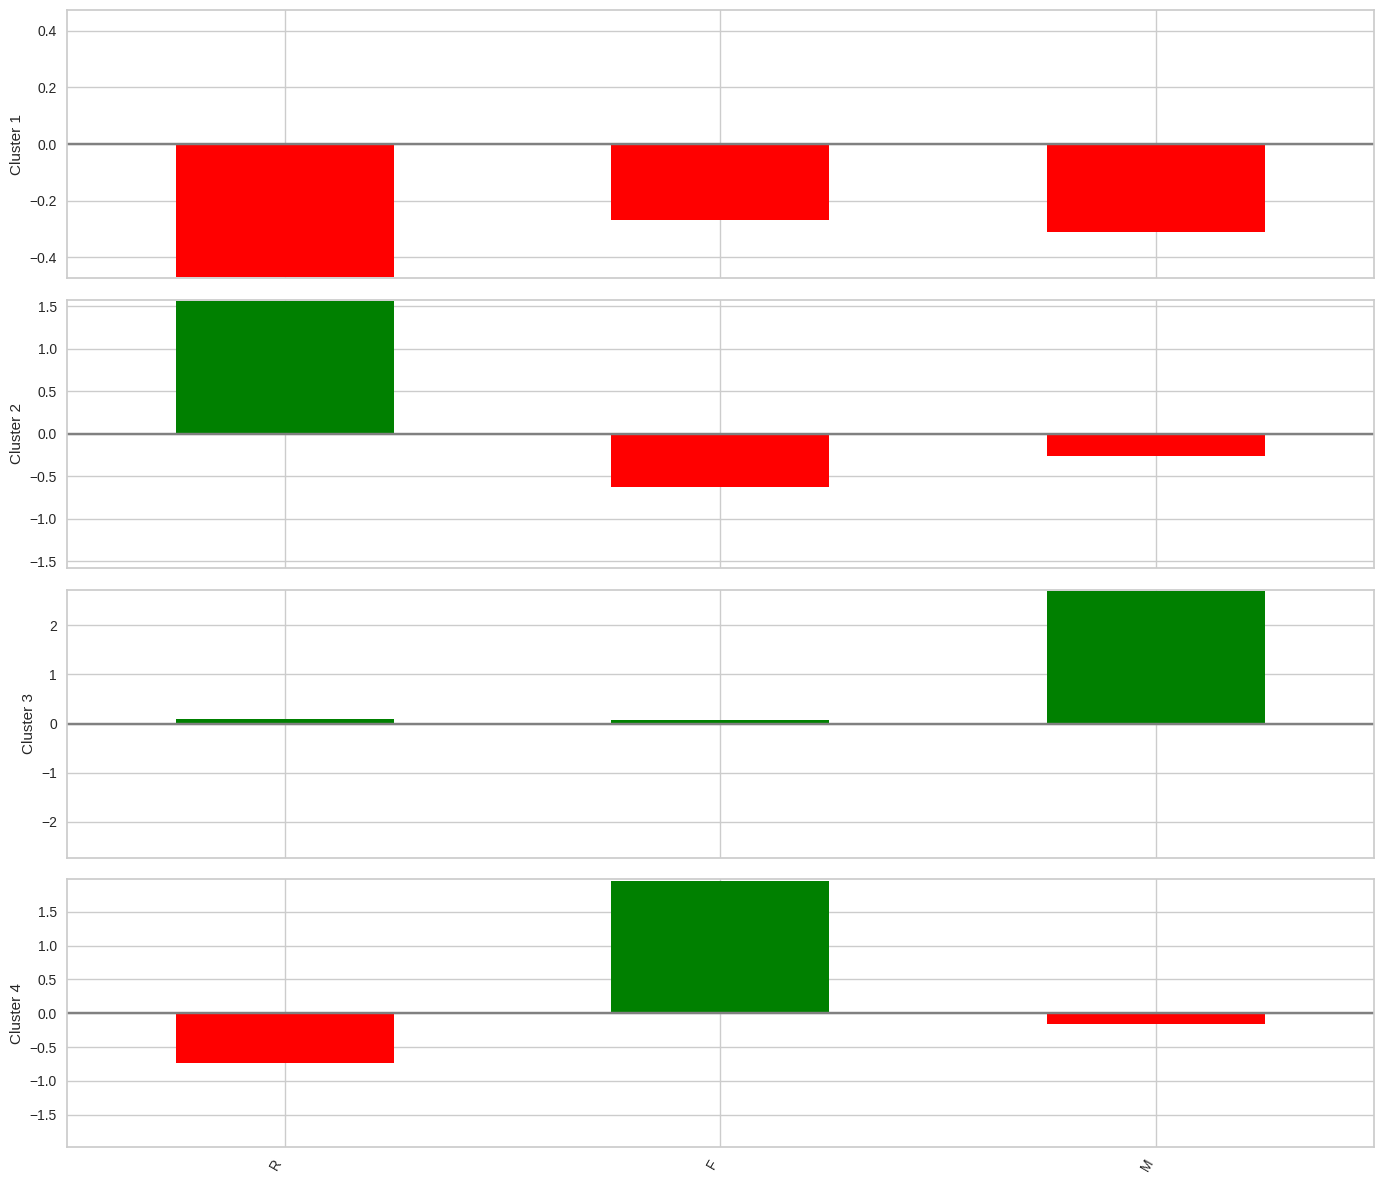

In [ ]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(
  dados_rfm_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,67.526002,261.201439,121.317500,41.517018
F,2.703751,1.509764,3.862500,10.191248
M,17.106104,18.033822,80.496497,20.426973


Para determinar qual cluster é melhor com base nos resultados RFM fornecidos, geralmente seguimos estas interpretações:

1. **Recency (R)**: Quanto menor o valor de R, melhor, pois indica que os clientes estão mais recentemente engajados.
2. **Frequency (F)**: Quanto maior o valor de F, melhor, indicando que os clientes fazem mais compras.
3. **Monetary (M)**: Quanto maior o valor de M, melhor, indicando que os clientes gastam mais.

Vamos analisar os resultados fornecidos:

- **Cluster 0**:
  - R: 67.526002
  - F: 2.703751
  - M: 17.106104

- **Cluster 1**:
  - R: 261.201439
  - F: 1.509764
  - M: 18.033822

- **Cluster 2**:
  - R: 121.317500
  - F: 3.862500
  - M: 80.496497

- **Cluster 3**:
  - R: 41.517018
  - F: 10.191248
  - M: 20.426973

**Análise por Componente RFM**:

- **Recency (R)**:
  - Cluster 3 (R = 41.517018) possui o menor valor de Recency, o que é melhor.
  - Cluster 0 (R = 67.526002) também tem um valor razoável de Recency.
  - Cluster 2 (R = 121.317500) e Cluster 1 (R = 261.201439) têm valores mais altos de Recency, indicando menor engajamento recente.

- **Frequency (F)**:
  - Cluster 3 (F = 10.191248) tem o maior valor de Frequency, o que é melhor.
  - Cluster 2 (F = 3.862500) também mostra um bom valor de Frequency.
  - Cluster 0 (F = 2.703751) e Cluster 1 (F = 1.509764) têm valores mais baixos de Frequency.

- **Monetary (M)**:
  - Cluster 2 (M = 80.496497) tem o maior valor de Monetary, o que é melhor.
  - Cluster 3 (M = 20.426973) também tem um valor razoável de Monetary.
  - Cluster 0 (M = 17.106104) e Cluster 1 (M = 18.033822) têm valores mais baixos de Monetary.

**Conclusão**:

- **Cluster 3** parece ser o melhor em termos gerais, pois tem o menor Recency (indicando maior engajamento recente), o maior Frequency (indicando compras mais frequentes) e um valor razoável de Monetary.
- **Cluster 2** também se destaca com um alto valor de Monetary, mas com Recency e Frequency não tão bons quanto o Cluster 3.

Portanto, se você estiver procurando por um cluster que tenha uma combinação de engajamento recente, frequência de compras e valor monetário gasto, **Cluster 3** seria uma escolha preferencial com base nos dados fornecidos.

# 6. Recomendações de Marketing

**Foco nos Grupos de Clientes com Base na Análise RFM**

Caros membros da equipe de marketing,

Com base na análise detalhada de nossos clientes usando a metodologia RFM (Recency, Frequency, Monetary), identificamos grupos distintos que podem orientar nossas estratégias de campanha de maneira mais eficaz. Esses grupos foram categorizados com base nos seguintes critérios:

1. **Cluster 3 - Oportunidade de Engajamento Contínuo:**
   - Este grupo demonstra um bom engajamento recente (Recency mais baixo), indicando que estão ativos e receptivos.
   - Apresenta a frequência mais alta de compras (Frequency mais alta), sugerindo uma base de clientes leal e engajada.
   - Embora o valor monetário gasto (Monetary) não seja o mais alto, o potencial de retorno e fidelização é promissor.

**Estratégia Recomendada:**
   - **Campanhas de Engajamento:** Ofertas exclusivas e personalizadas para incentivar compras repetidas.
   - **Programas de Fidelidade:** Incentivos para aumentar a frequência de compra e recompensar a lealdade.
   - **Feedback e Interatividade:** Solicitar feedback para melhorar continuamente a experiência do cliente.

2. **Cluster 2 - Maximizando o Valor do Cliente:**
   - Este grupo apresenta o maior valor monetário gasto (Monetary mais alto), indicando um potencial significativo de receita.
   - Apesar de ter um recency e frequency moderados, o foco em aumentar o ticket médio e a rentabilidade é crucial.

**Estratégia Recomendada:**
   - **Upselling e Cross-selling:** Ofertas personalizadas para aumentar o valor do carrinho de compras.
   - **Experiências Premium:** Campanhas que destacam produtos de alto valor e exclusivos.
   - **Serviço ao Cliente Dedicado:** Garantir um serviço personalizado para maximizar a satisfação e o valor percebido.

**Implementação:**
   - Utilizaremos estas insights para direcionar nossas campanhas com precisão, personalizando mensagens e ofertas para atender às necessidades específicas de cada grupo.
   - Monitoraremos continuamente o desempenho das campanhas através de métricas RFM atualizadas para ajustar estratégias conforme necessário.

Vamos trabalhar juntos para aproveitar ao máximo o potencial desses grupos identificados, proporcionando uma experiência excepcional aos nossos clientes e impulsionando o crescimento sustentável da nossa empresa.

Contamos com a colaboração de todos para o sucesso destas iniciativas.

Atenciosamente,

Phillipe dos Santos

In [ ]:
# Atribuindo aos clientes seus respectivos clusters
dados_rfm_clip_scaled['Cluster'] = kmeans_labels
dados_rfm_clip_scaled

,R,F,M,Cluster
CustomerID,,,,
12347,-0.924127,1.009892,0.002223,3
12348,-0.159677,0.116666,1.635962,2
12349,-0.756576,-0.776560,0.021026,0
12350,2.301222,-0.776560,-0.188844,1
12352,-0.568082,1.307634,0.278601,3
...,...,...,...,...
18280,1.955649,-0.776560,-0.265571,1
18281,0.939873,-0.776560,-0.575905,1
18282,-0.871767,-0.478818,-0.419088,0


In [ ]:
# Salvando os dados com os Clusters
dados_rfm_clip_scaled.to_csv('dados_rfm_clip_scaled.csv')